In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install konlpy

%cd /usr/local/lib/python3.8/dist-packages/konlpy/java

!jar xvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar

with open(f"/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt") as f:
    data = f.read()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 49.6 MB/s eta 0:00:00
/usr/local/lib/python3.8/dist-packages/konlpy/java
  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/proce

In [3]:
data += '여기어때\n데일리호텔\n야놀자\n인터파크투어\n마이리얼트립\n호텔스닷컴\n익스피디아\n에어비앤비\n부킹닷컴\n트리바고\n스카이스캐너\n호텔스컴파인\n아고다\n가성비\n코로나\n최저가\n본인인증\n체크인\n체크아웃\n카카오톡'

with open("/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(data)

In [4]:
!jar cvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar * 

added manifest
adding: aho-corasick.jar(in = 79138) (out= 76068)(deflated 3%)
adding: bin/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/comm/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/comm/HannanumInterface.class(in = 3352) (out= 1633)(deflated 51%)
adding: bin/kr/lucypark/jhannanum/hannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/hannanum/WorkflowFactory.class(in = 2931) (out= 1095)(deflated 62%)
adding: bin/kr/lucypark/komoran/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/komoran/KomoranInterface.class(in = 2460) (out= 1213)(deflated 50%)
adding: bin/kr/lucypark/okt/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/okt/OktInterface.class(in = 3075) (out= 1460)(deflated 52%)
adding: bin/kr/lucypark/kkma/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/kkm

In [5]:
import pandas as pd


topic_6 = pd.read_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_6.csv')

In [6]:
topic_6 = topic_6.drop(columns = ['Unnamed: 0'])

topic_6

,text
0,보이는 금액과 실 결제금액이 다릅니다 카드 입력 후 결제가 어렵고 에러가 나서 다음...
1,할인 정보 알람을 껐는데도 계속 알람 오고 알람 설정 페이지는 맨날 인터넷 연결하라...
2,신용카드 결제하기가 왜 그렇게든지 무한 루프 타다가 포기
3,아고다 캐시 적용 후 예약 도 중 결제 실패해서 다시 했더니 아고다 캐시가 없어졌네...
4,알림 설정 시 혜택 알림과 필수 알림 분리 안 됨
...,...
749,여행의 필수 어플 원만 하면 한곳만 파는 게 대세
750,최악 숙소 예약 때문에 어쩔 수 없이 사용하지만 신용카드 결제 부분에 관해서는...
751,숙박 앱 중 가격도 저렴하고 정보도 다양하고 좋았습니다 대만족입니다
752,갑자기 수신 동의 변경 메일이 도착했어요 수신 동의 한 적도 없는데 오늘 오후 시분...


In [7]:
import pickle

with open("/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/명사 추출 코퍼스 저장/stop_words.pkl","rb") as f:
    stop_words = pickle.load(f)

In [8]:
!pip install gensim
!pip install wget

import gensim
# bigram 생성에 필요한 library
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt
import re
from tqdm import tqdm
import time

def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)
    
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':
          if len(word) > 1:
            if word not in stop_words:
              words.append(word)            
    return words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=e1672b1907821121a8b97daf5abab3301047c5542caf85a305390f8352cda8a7
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [9]:
topic_6.shape

(754, 1)

In [10]:
tokenized_list = []

for text in tqdm(topic_6['text'][:1530]):                 # 숫자 수정
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[0])

100%|██████████| 754/754 [00:36<00:00, 20.64it/s]

754
['금액', '결제', '금액', '카드', '입력', '결제', '에러', '화면']


In [11]:
drop_corpus = []

for index in range(len(tokenized_list)):
    corpus = tokenized_list[index]
    if len(set(corpus)) < 3:   
        topic_6.drop(index, axis='index', inplace=True)
        drop_corpus.append(corpus)
    
for corpus in drop_corpus:
    tokenized_list.remove(corpus)

topic_6.reset_index(drop=True, inplace=True)

In [12]:
bigram = Phrases(tokenized_list, min_count=10, threshold=10)
bigram_mod = Phraser(bigram)
 
words_bigram = [bigram_mod[doc] for doc in tokenized_list]

In [13]:
import wget
url = 'http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip'
wget.download(url)

!unzip mallet-2.0.8.zip

import os
from gensim.models.wrappers import LdaMallet
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/usr/local/lib/python3.8/dist-packages/konlpy/java/mallet-2.0.8/bin/mallet'

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [14]:
import gensim
import gensim.corpora as corpora
from gensim import corpora
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel

id2word=corpora.Dictionary(words_bigram)
id2word.filter_extremes(no_below = 10 ) #5회 이하로 등장한 단어는 삭제
texts = words_bigram
corpus=[id2word.doc2bow(text) for text in texts] ## BoW 생성 ##

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step=1):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=words_bigram, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is

Num Topics = 2  has Coherence Value of 0.32632873968460996
Num Topics = 3  has Coherence Value of 0.3982878670638685
Num Topics = 4  has Coherence Value of 0.3570701014547953
Num Topics = 5  has Coherence Value of 0.3773989986628493


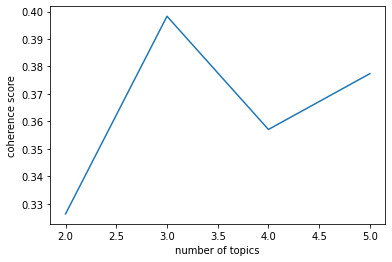

In [38]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words_bigram, start=2, limit=6, step=1)

limit=6; start=2; step=1;
x = range(start, limit, step)
topic_num = 0
count = 0
max_coherence = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv,)
    coherence = cv
    if coherence >= max_coherence:
        max_coherence = coherence
        topic_num = m
        model_list_num = count   
    count = count+1
# 높은값이 최적~!~!

plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()
                
# Select the model and print the topics
optimal_model = model_list[model_list_num]
model_topics = optimal_model.show_topics(formatted=False)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fro

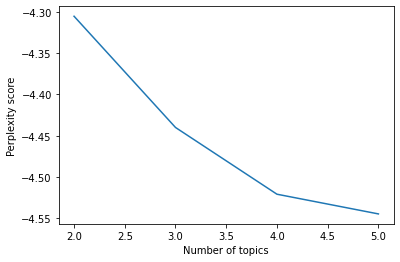

In [39]:
perplexity_values = []
for i in range(2,6): # 2~8 하이퍼 파라미터를 변경하면서 점수 계산
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = id2word)
    perplexity_values.append(ldamodel.log_perplexity(corpus)) 

x = range(2,6)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [40]:
gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [41]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(gensim_model, corpus, id2word)
vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.000916  0.000109       1        1  33.826482
0      0.000339 -0.000684       2        1  33.248594
1      0.000577  0.000575       3        1  32.924924, topic_info=    Term       Freq      Total Category  logprob  loglift
40    방법  34.000000  34.000000  Default  30.0000  30.0000
78    일정  35.000000  35.000000  Default  29.0000  29.0000
91    리뷰  36.000000  36.000000  Default  28.0000  28.0000
22    환불  33.000000  33.000000  Default  27.0000  27.0000
43    과정  34.000000  34.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
8     페이  12.083660  36.068536   Topic3  -4.6933   0.0174
106  렌터카  12.158425  36.619465   Topic3  -4.6871   0.0084
3     화면  12.492658  38.771035   Topic3  -4.6600  -0.0216
96    사진  11.951769  35.653107   Topic3  -4.7042   0.0180
19   메시지  11.884577  35.474146   Topic3  -4.7099   0.0174

[149 rows x 6 columns], token_table=      Topic      Freq Term
term                      
31        1  0.335426   가격
31        2  0.307474   가격
31        3  0.335426   가격
97        1  0.393235   간편
97        2  0.308970   간편
...     ...       ...  ...
22        2  0.353600   환불
22        3  0.353600   환불
110       1  0.325526   후기
110       2  0.325526   후기
110       3  0.355119   후기

[279 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [42]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    #ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,topn=20)                            #이거 숫자 바꿈
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    print(type(sent_topics_df))

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([sent_topics_df, topic_6['text']], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=words_bigram)

# Format
df_topic_review = df_topic_sents_keywords.reset_index()
df_topic_review.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'text']

# Show각 문서에 대한 토픽
df_dominant_topic=df_topic_review.sort_values(by=['Dominant_Topic'])
df_dominant_topic

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,text
0,0,0.0,0.3512,"금액, 변경, 해외, 호스트, 할인, 추가, 만원, 검색, 안내, 서비스, 투어, ...",보이는 금액과 실 결제금액이 다릅니다 카드 입력 후 결제가 어렵고 에러가 나서 다음...
431,431,0.0,0.3522,"금액, 변경, 해외, 호스트, 할인, 추가, 만원, 검색, 안내, 서비스, 투어, ...",해외 결제 부가 금액 아까움
424,424,0.0,0.3690,"금액, 변경, 해외, 호스트, 할인, 추가, 만원, 검색, 안내, 서비스, 투어, ...",다른 사이트와 달리 세금 포함 최종 금액이 표시되어 편합니다 그리고 사진과 설명이 ...
423,423,0.0,0.3464,"금액, 변경, 해외, 호스트, 할인, 추가, 만원, 검색, 안내, 서비스, 투어, ...",처음이자 마지막 사용 예상보다 더 더러워서 빡 치고 컴플레인 걸 다빡 치고 만원 아...
418,418,0.0,0.3464,"금액, 변경, 해외, 호스트, 할인, 추가, 만원, 검색, 안내, 서비스, 투어, ...",예약을 클릭하면 예약 날짜 달력 날짜 아래 금액이 보이게 해주세요
...,...,...,...,...,...
112,112,2.0,0.3522,"결제, 카드, 환불, 등록, 수수료, 달러, 고객_센터, 쿠폰, 문의, 선택, 승인...",여기어때 앱으로 결제하고 가면 현장에서 결제한 것보다 천원 더 비싸네요 여행 갔는데...
322,322,2.0,0.3590,"결제, 카드, 환불, 등록, 수수료, 달러, 고객_센터, 쿠폰, 문의, 선택, 승인...",자꾸 결제 등록하려 하는데 접속한 도 도달이라고 떠요
422,422,2.0,0.3711,"결제, 카드, 환불, 등록, 수수료, 달러, 고객_센터, 쿠폰, 문의, 선택, 승인...",좋다 대신 결제를 할 때 다 선택하고 신중하게 해야 합니다 안 그러면 시간 동안 결...
497,497,2.0,0.4103,"결제, 카드, 환불, 등록, 수수료, 달러, 고객_센터, 쿠폰, 문의, 선택, 승인...",숙소 예약하는 과정에서 카드 등록하라길래 잘 몰라서 비자 마스터카드가 아닌 등록 안...


In [43]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

lda_inform = pd.concat([sent_topics_sorteddf_mallet, topic_counts, topic_contribution], axis=1)
lda_inform.columns=["Topic_Num", "Topic_Perc_Contrib", "Keywords", "text", "Num_Documents", "Perc_Documents"]
lda_inform = lda_inform[["Topic_Num", "Keywords","Num_Documents","Perc_Documents"]]
lda_inform
#lda_inform.Topic_Num = lda_inform.Topic_Num.astype(int)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'] +1
lda_inform.Topic_Num = lda_inform.Topic_Num.astype(str)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'].str.split('.').str[0]
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'] +1
df_topic_review.Dominant_Topic = df_topic_review.Dominant_Topic.astype(str)
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'].str.split('.').str[0]

In [44]:
lda_inform.to_csv ("./lda_inform.csv", index = None, encoding="CP949")
lda_inform

,Topic_Num,Keywords,Num_Documents,Perc_Documents
0.0,1,"금액, 변경, 해외, 호스트, 할인, 추가, 만원, 검색, 안내, 서비스, 투어, ...",321,0.4297
1.0,2,"취소, 가격, 시스템, 정보, 카드_등록, 개선, 체크인, 알림, 문자, 한국, 때...",241,0.3226
2.0,3,"결제, 카드, 환불, 등록, 수수료, 달러, 고객_센터, 쿠폰, 문의, 선택, 승인...",185,0.2477
